In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [9]:
df=pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')


In [10]:
df.head()

day  month  year  Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  \
0    1      6  2012           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4   
1    2      6  2012           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9   
2    3      6  2012           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7   
3    4      6  2012           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7   
4    5      6  2012           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9   

   FWI      Classes  Region  
0  0.5  not fire          0  
1  0.4  not fire          0  
2  0.1  not fire          0  
3  0.0  not fire          0  
4  0.5  not fire          0

In [11]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [12]:
##drop month,day and yyear
df.drop(['day','month','year'],axis=1,inplace=True)

In [13]:
df.head()

Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  FWI      Classes  \
0           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4  0.5  not fire      
1           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9  0.4  not fire      
2           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1  not fire      
3           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7  0.0  not fire      
4           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9  0.5  not fire      

   Region  
0       0  
1       0  
2       0  
3       0  
4       0

In [14]:
df['Classes'].value_counts()

fire             131
not fire         100
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

In [15]:
## Encoding
df['Classes']=np.where(df['Classes'].str.contains("not fire"),0,1)

In [16]:
df.tail()

Temperature  RH  Ws  Rain  FFMC   DMC    DC  ISI   BUI  FWI  Classes  \
237           30  65  14   0.0  85.4  16.0  44.5  4.5  16.9  6.5        1   
238           28  87  15   4.4  41.1   6.5   8.0  0.1   6.2  0.0        0   
239           27  87  29   0.5  45.9   3.5   7.9  0.4   3.4  0.2        0   
240           24  54  18   0.1  79.7   4.3  15.2  1.7   5.1  0.7        0   
241           24  64  15   0.2  67.3   3.8  16.5  1.2   4.8  0.5        0   

     Region  
237       1  
238       1  
239       1  
240       1  
241       1

In [17]:
df['Classes'].value_counts()

1    137
0    105
Name: Classes, dtype: int64

In [18]:
## Independent And dependent features
X=df.drop('FWI',axis=1)
y=df['FWI']

In [19]:
X.head()

Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  Classes  Region
0           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4        0       0
1           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9        0       0
2           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7        0       0
3           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7        0       0
4           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9        0       0

In [20]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
237    6.5
238    0.0
239    0.2
240    0.7
241    0.5
Name: FWI, Length: 242, dtype: float64

In [21]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [22]:
X_train.shape,X_test.shape

((181, 11), (61, 11))

In [23]:
## Feature Selection based on correlaltion
X_train.corr()

Temperature        RH        Ws      Rain      FFMC       DMC  \
Temperature     1.000000 -0.650346 -0.302105 -0.329711  0.703237  0.494261   
RH             -0.650346  1.000000  0.266525  0.234932 -0.634330 -0.413931   
Ws             -0.302105  0.266525  1.000000  0.219681 -0.171843  0.000277   
Rain           -0.329711  0.234932  0.219681  1.000000 -0.546501 -0.286855   
FFMC            0.703237 -0.634330 -0.171843 -0.546501  1.000000  0.621240   
DMC             0.494261 -0.413931  0.000277 -0.286855  0.621240  1.000000   
DC              0.377424 -0.246125  0.105115 -0.300276  0.537884  0.876734   
ISI             0.617606 -0.693939  0.005360 -0.346706  0.751558  0.693404   
BUI             0.466352 -0.364136  0.038701 -0.297934  0.610780  0.983698   
Classes         0.525551 -0.435094 -0.059470 -0.386323  0.780805  0.613507   
Region          0.249598 -0.364007 -0.235477 -0.065132  0.222702  0.196778   

                   DC       ISI       BUI   Classes    Region  
Temperature  0.377424  0.617606  0.466352  0.525551  0.249598  
RH          -0.246125 -0.693939 -0.364136 -0.435094 -0.364007  
Ws           0.105115  0.005360  0.038701 -0.059470 -0.235477  
Rain        -0.300276 -0.346706 -0.297934 -0.386323 -0.065132  
FFMC         0.537884  0.751558  0.610780  0.780805  0.222702  
DMC          0.876734  0.693404  0.983698  0.613507  0.196778  
DC           1.000000  0.548992  0.946992  0.546427 -0.081403  
ISI          0.548992  1.000000  0.659589  0.749722  0.266275  
BUI          0.946992  0.659589  1.000000  0.609708  0.096607  
Classes      0.546427  0.749722  0.609708  1.000000  0.161852  
Region      -0.081403  0.266275  0.096607  0.161852  1.000000

<Axes: >

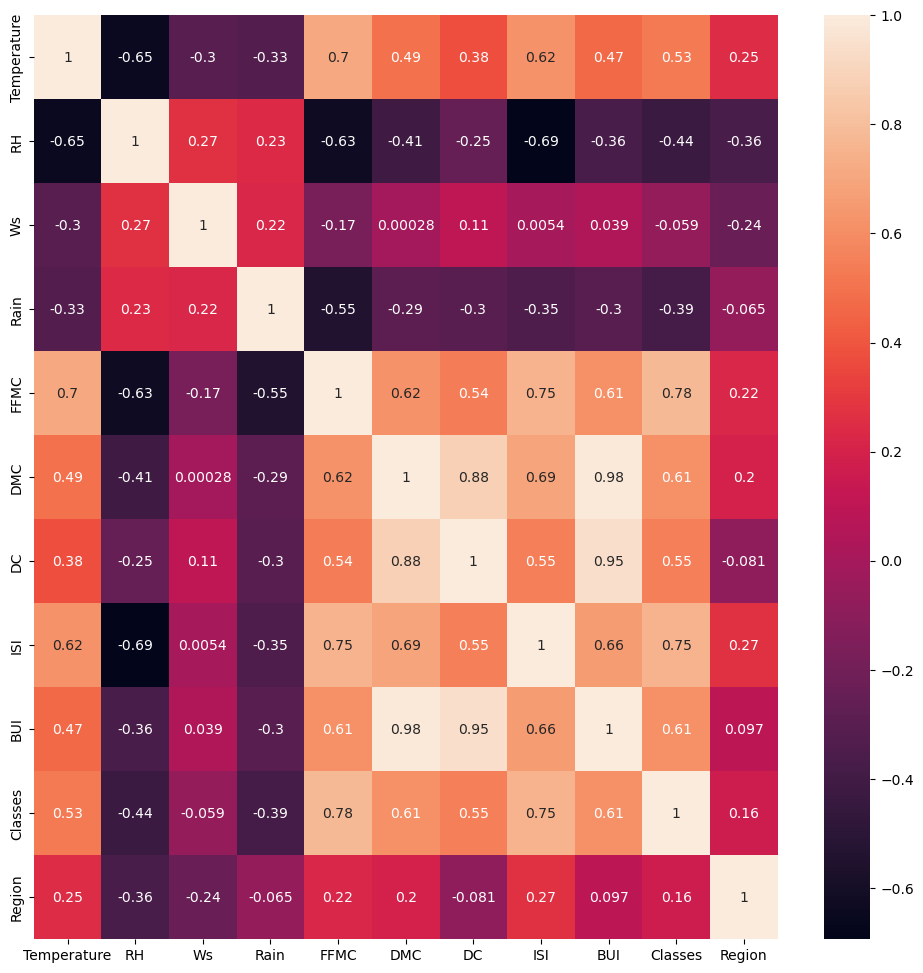

In [24]:
## Check for multicollinearity
plt.figure(figsize=(12,12))
corr=X_train.corr()
sns.heatmap(corr,annot=True)

In [25]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [26]:
## threshold
corr_features=correlation(X_train,0.85)

In [27]:
## drop features when correlation is more than 0.85
X_train.drop(corr_features,axis=1,inplace=True
            )
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape

((181, 9), (61, 9))

In [28]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [29]:
X_train_scaled

array([[-0.82836812,  0.75305576,  1.27406033, ..., -0.60658617,
        -1.07459849, -0.98356052],
       [-0.02800533, -0.52331623, -0.52192814, ...,  0.08124507,
         0.93058013,  1.01671425],
       [-0.82836812, -1.46380085, -2.67711431, ..., -0.46427625,
         0.93058013,  1.01671425],
       ...,
       [-1.89551851,  0.88741071,  0.55566494, ..., -1.05723422,
        -1.07459849, -0.98356052],
       [ 1.03914506, -0.45613875,  0.19646725, ...,  0.84023126,
         0.93058013,  1.01671425],
       [-0.56158052,  0.95458818,  1.99245572, ..., -0.84376935,
        -1.07459849, -0.98356052]])

C:\Users\user\AppData\Local\Temp\ipykernel_11384\160744393.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


Text(0.5, 1.0, 'X_train After Scaling')

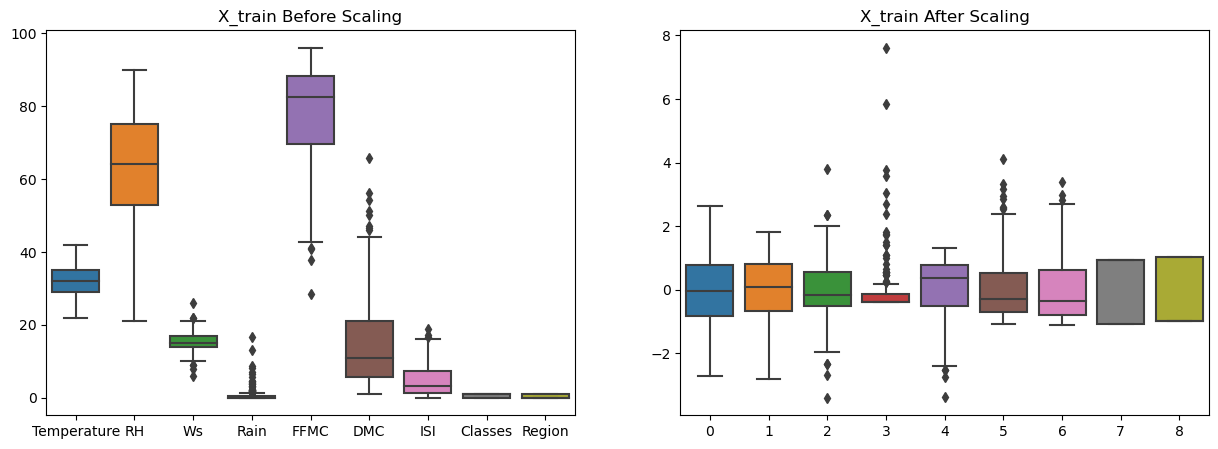

In [30]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

                          Mean Absolute Error  R² Score
Linear Regression                    0.583806  0.983523
Lasso Regression                     0.670164  0.980865
Ridge Regression                     0.856691  0.972993
ElasticNet Regression                0.729531  0.978932
Decision Tree                        1.204918  0.939279
Random Forest                        0.944902  0.962426
Gradient Boosting                    0.935677  0.962621
AdaBoost                             1.355225  0.941687
XGBoost                              0.951910  0.959111
Support Vector Regressor             1.261251  0.821467


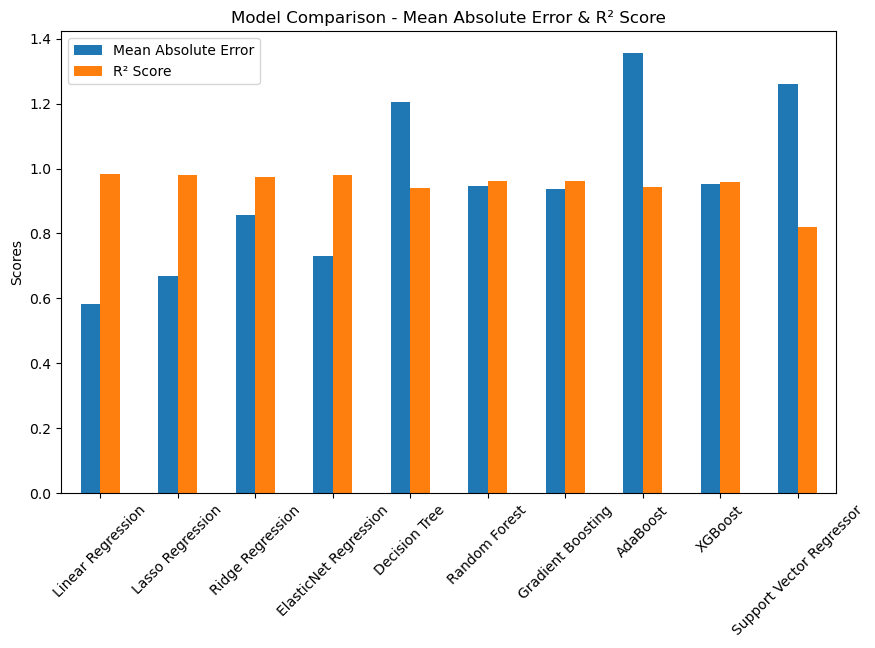

In [31]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, r2_score
import xgboost as xgb  # Ensure XGBoost is installed
import pandas as pd
import matplotlib.pyplot as plt

# Define a function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    score = r2_score(y_test, y_pred)
    return mae, score

# Initialize models including AdaBoost, Gradient Boosting, and XGBoost
models = {
    "Linear Regression": LinearRegression(),
    "Lasso Regression": LassoCV(cv=5),
    "Ridge Regression": RidgeCV(cv=5),
    "ElasticNet Regression": ElasticNetCV(cv=5),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "XGBoost": xgb.XGBRegressor(),
    "Support Vector Regressor": SVR()
}

# Store results
results = {}

# Evaluate each model
for model_name, model in models.items():
    mae, score = evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test)
    results[model_name] = {"Mean Absolute Error": mae, "R² Score": score}

# Convert results to DataFrame for easier visualization
results_df = pd.DataFrame(results).T
print(results_df)

# Visualize results
# Plot the results (mean absolute error and R² score)
results_df[['Mean Absolute Error', 'R² Score']].plot(kind='bar', figsize=(10, 6))
plt.title('Model Comparison - Mean Absolute Error & R² Score')
plt.ylabel('Scores')
plt.xticks(rotation=45)
plt.show()


Mean absolute error 0.5838063599546962
R2 Score 0.983523052949508


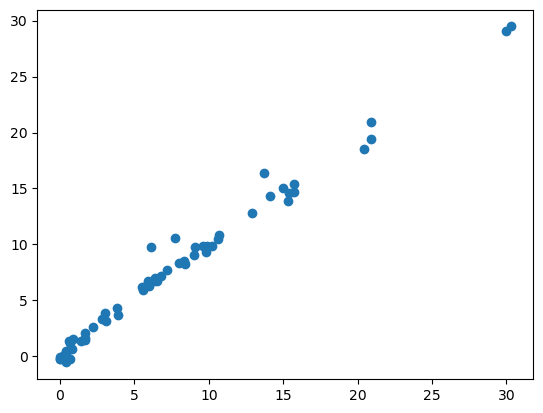

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg=LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred=linreg.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

Mean absolute error 1.145997996939169
R2 Score 0.9497712193501187


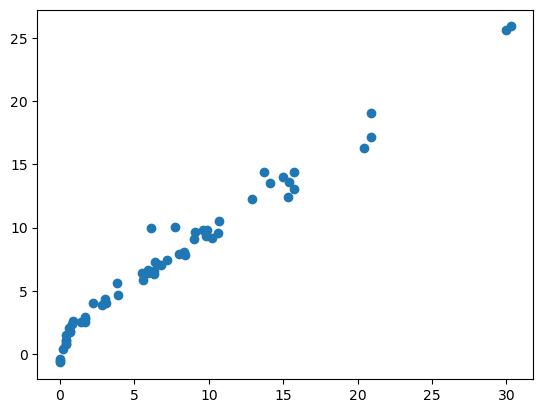

In [40]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso=Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred=lasso.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

In [41]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(X_train_scaled,y_train)

LassoCV(cv=5)

In [42]:
lassocv.alpha_

0.06481103951672906

In [44]:
lassocv.alphas_

array([6.94947533, 6.48110395, 6.04429924, 5.6369337 , 5.25702323,
       4.90271746, 4.57229071, 4.26413362, 3.97674529, 3.70872596,
       3.45877025, 3.22566071, 3.00826197, 2.80551518, 2.61643285,
       2.44009403, 2.27563986, 2.12226935, 1.9792355 , 1.84584165,
       1.7214381 , 1.60541894, 1.49721907, 1.39631152, 1.3022048 ,
       1.21444055, 1.13259132, 1.05625846, 0.98507017, 0.91867974,
       0.8567638 , 0.79902079, 0.74516946, 0.69494753, 0.6481104 ,
       0.60442992, 0.56369337, 0.52570232, 0.49027175, 0.45722907,
       0.42641336, 0.39767453, 0.3708726 , 0.34587702, 0.32256607,
       0.3008262 , 0.28055152, 0.26164329, 0.2440094 , 0.22756399,
       0.21222694, 0.19792355, 0.18458417, 0.17214381, 0.16054189,
       0.14972191, 0.13963115, 0.13022048, 0.12144406, 0.11325913,
       0.10562585, 0.09850702, 0.09186797, 0.08567638, 0.07990208,
       0.07451695, 0.06949475, 0.06481104, 0.06044299, 0.05636934,
       0.05257023, 0.04902717, 0.04572291, 0.04264134, 0.03976

In [43]:
lassocv.mse_path_

array([[54.83966454, 59.07855795, 38.72729712, 78.24916791, 53.00661707],
       [48.33127443, 52.98238939, 33.40705056, 76.17370919, 47.37592787],
       [42.489492  , 46.9476325 , 28.61641869, 69.11179183, 42.46600092],
       [37.38816074, 41.6222327 , 24.54198449, 62.88571919, 38.18380814],
       [32.93231013, 36.95463498, 21.08421335, 57.39228141, 33.53847098],
       [29.03908563, 32.86149181, 18.15701813, 52.54133041, 29.14966015],
       [25.63631212, 29.27011099, 15.68586523, 48.25410422, 25.34331445],
       [22.66140204, 26.11749884, 13.60632992, 43.16468118, 22.0425561 ],
       [20.05957707, 23.34834079, 11.86266757, 37.9874641 , 19.18168383],
       [17.78321296, 20.91452315, 10.40680285, 33.46741145, 16.70233718],
       [15.79082322, 18.77407566,  9.19714128, 29.52048402, 14.5542223 ],
       [14.0461701 , 16.89025254,  8.19780164, 26.07233474, 12.69363691],
       [12.51796119, 15.23137028,  7.37783328, 23.06047803, 11.08260866],
       [11.17864417, 13.76938633,  6.7

Mean absolute error 0.6701641696301907
R2 Score 0.9808648686248684


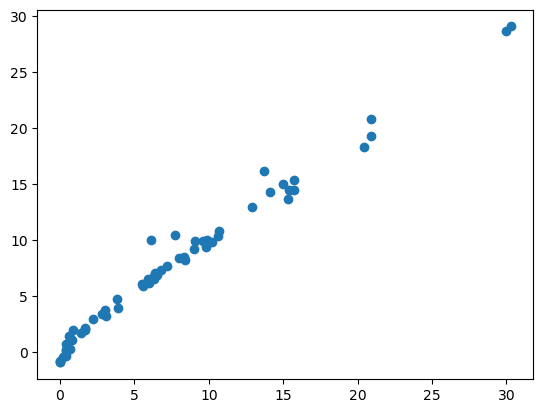

In [45]:
y_pred=lassocv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 0.6125515638101013
R2 Score 0.982698355229298


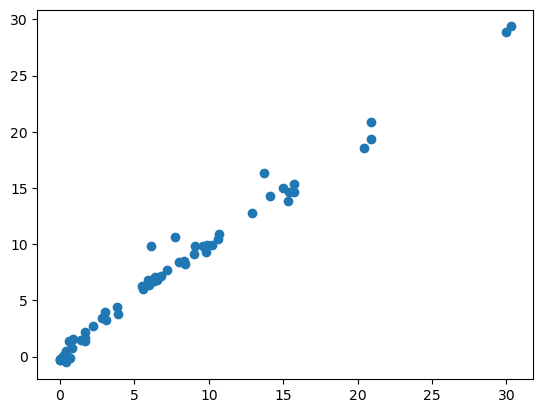

In [46]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge=Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred=ridge.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)


Mean absolute error 0.8566908888843255
R2 Score 0.972992811439674


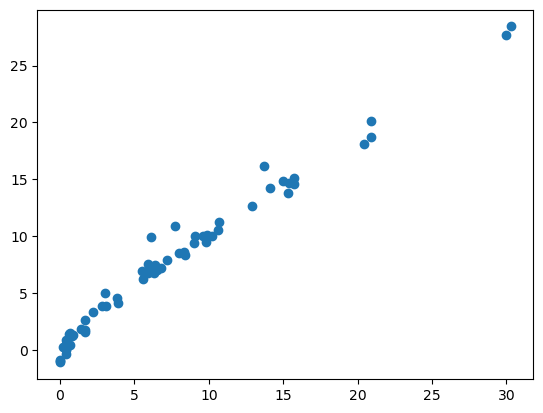

In [47]:
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(cv=5)
ridgecv.fit(X_train_scaled,y_train)
y_pred=ridgecv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

In [48]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_values': False}

Mean absolute error 1.8915134363047037
R2 Score 0.8731354681001338


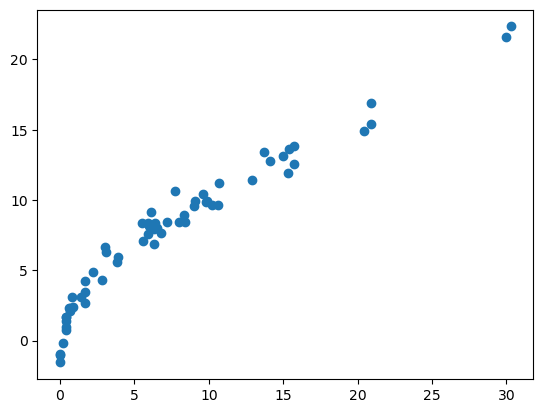

In [49]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elastic=ElasticNet()
elastic.fit(X_train_scaled,y_train)
y_pred=elastic.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

Mean absolute error 0.7295307419548663
R2 Score 0.9789324233433637


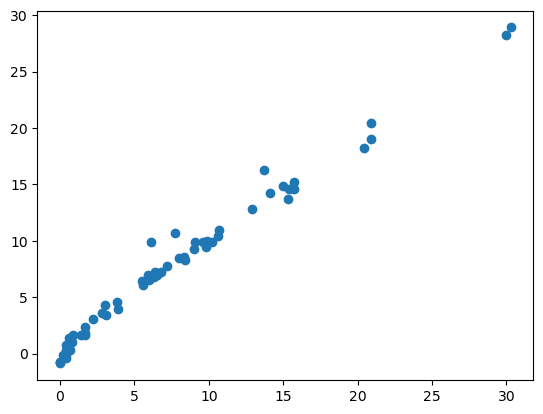

In [50]:
from sklearn.linear_model import ElasticNetCV
elasticcv=ElasticNetCV(cv=5)
elasticcv.fit(X_train_scaled,y_train)
y_pred=elasticcv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

In [51]:
elasticcv.alphas_

array([1.38989507e+01, 1.29622079e+01, 1.20885985e+01, 1.12738674e+01,
       1.05140465e+01, 9.80543492e+00, 9.14458143e+00, 8.52826724e+00,
       7.95349058e+00, 7.41745193e+00, 6.91754050e+00, 6.45132142e+00,
       6.01652395e+00, 5.61103037e+00, 5.23286570e+00, 4.88018807e+00,
       4.55127972e+00, 4.24453870e+00, 3.95847100e+00, 3.69168330e+00,
       3.44287621e+00, 3.21083787e+00, 2.99443815e+00, 2.79262304e+00,
       2.60440959e+00, 2.42888110e+00, 2.26518264e+00, 2.11251691e+00,
       1.97014035e+00, 1.83735948e+00, 1.71352760e+00, 1.59804157e+00,
       1.49033892e+00, 1.38989507e+00, 1.29622079e+00, 1.20885985e+00,
       1.12738674e+00, 1.05140465e+00, 9.80543492e-01, 9.14458143e-01,
       8.52826724e-01, 7.95349058e-01, 7.41745193e-01, 6.91754050e-01,
       6.45132142e-01, 6.01652395e-01, 5.61103037e-01, 5.23286570e-01,
       4.88018807e-01, 4.55127972e-01, 4.24453870e-01, 3.95847100e-01,
       3.69168330e-01, 3.44287621e-01, 3.21083787e-01, 2.99443815e-01,
      

In [52]:
scaler

StandardScaler()

In [53]:
ridge

Ridge()

In [55]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))


In [56]:
from IPython.display import FileLink

# Create download links
display(FileLink('scaler.pkl'))
display(FileLink('ridge.pkl'))

C:\Users\user\scaler.pkl

C:\Users\user\ridge.pkl